In [1]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


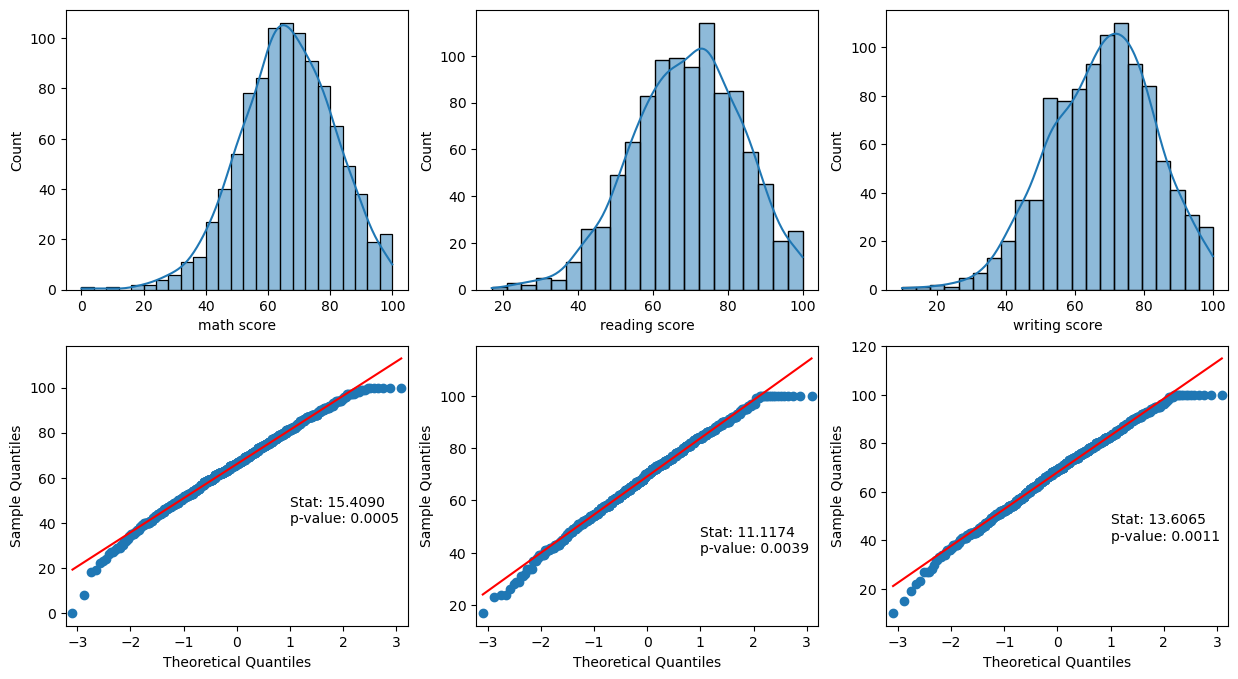

In [2]:
scores = df.iloc[:,-3:] #extracting scores from math, reading, writing
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

def hist_qqplot(series, row, col):
    sns.histplot(x=series, ax = ax[row,col], kde=True)
    sm.qqplot(series, line = 's', ax = ax[row+1, col])
    s, p = normaltest(series)
    ax[row+1, col].annotate(f'Stat: {s:.4f} \np-value: {p:.4f}', xy = (1, 40))

hist_qqplot(scores['math score'], 0, 0)
hist_qqplot(scores['reading score'], 0, 1)
hist_qqplot(scores['writing score'], 0, 2)


Friedman statistic: 102.56008359456598, W: 0.05128004179728299
pvalue: 5.362419870508941e-23


<Axes: xlabel='variable', ylabel='value'>

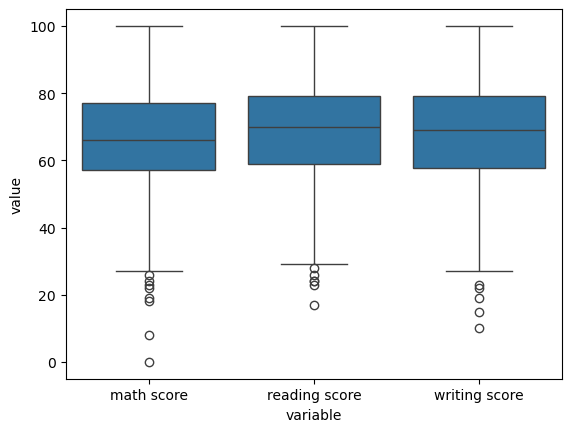

In [6]:
#ANOVA Friedman test 
from scipy.stats import friedmanchisquare
s, p = friedmanchisquare(scores.iloc[:,0], scores.iloc[:,1], scores.iloc[:,2])
W = s / (scores.shape[0] * (scores.shape[1] - 1))
print(f'Friedman statistic: {s}, W: {W}')
print(f'pvalue: {p}')

unpivoted = pd.melt(scores, value_vars=['math score', 'reading score', 'writing score'])
sns.boxplot(data = unpivoted, x = 'variable', y = 'value')

               math score  reading score  writing score
math score       1.000000       0.804064       0.778339
reading score    0.804064       1.000000       0.948953
writing score    0.778339       0.948953       1.000000


<Axes: >

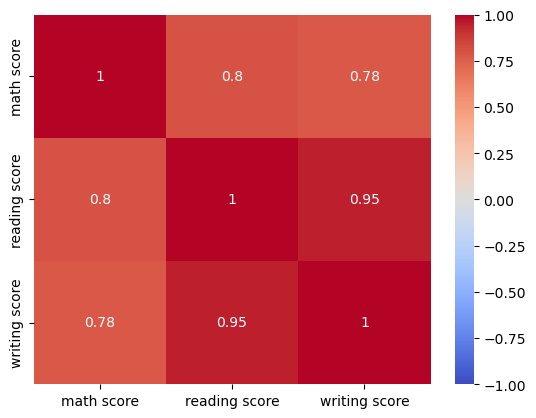

In [18]:
corr_rang = scores.corr(method = 'spearman')

print(corr_rang)
sns.heatmap(corr_rang, annot= True, cmap = 'coolwarm', vmin = -1, vmax = 1)

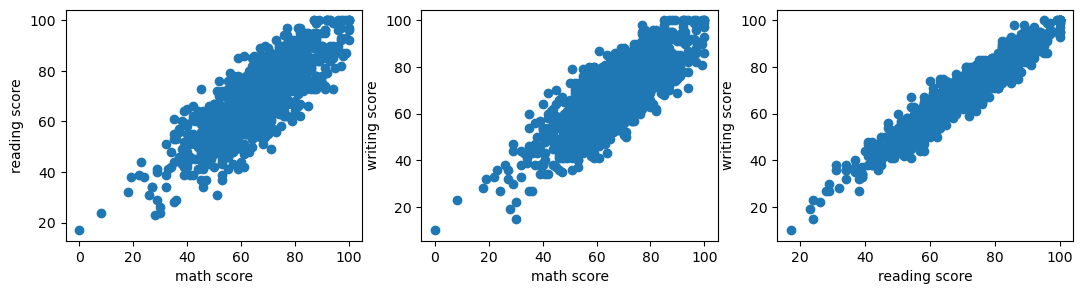

In [5]:
def scatterplot(s1, s2, i):
    ax[i].scatter(s1, s2)
    ax[i].set_ylabel(s2.name)
    ax[i].set_xlabel(s1.name)
fig, ax = plt.subplots(1, 3, figsize = (13,3))
math=scores['math score']
reading=scores['reading score']
writing=scores['writing score']

scatterplot(math, reading, 0)
scatterplot(math, writing, 1)
scatterplot(reading, writing, 2)